# Intro to MLFlow I

Learn how to:

- Install MLFlow
- Run MLFlow Server
- Log parameters, metrics and artifacts

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import mlflow

In [5]:
MLFLOW_TRACKING_URL = "http://127.0.0.1:5000"

mlflow.set_tracking_uri(MLFLOW_TRACKING_URL)

In [6]:
# if not working this will raise an exception
experiments = mlflow.search_experiments()

In [7]:
len(experiments)

2

## Connect to Experiment

In [8]:
EXPERIMENT_NAME = "My Experiment"

mlflow.set_experiment("EXPERIMENT_NAME")

<Experiment: artifact_location='mlflow-artifacts:/209005185598130493', creation_time=1750071519444, experiment_id='209005185598130493', last_update_time=1750071519444, lifecycle_stage='active', name='EXPERIMENT_NAME', tags={}>

## Create my first run

In [9]:
with mlflow.start_run():

    # train the model
    # log parameters, metrics and artifacts
   
    pass

🏃 View run sedate-gnat-5 at: http://127.0.0.1:5000/#/experiments/209005185598130493/runs/33e685bf93e94ac2bb347c87fb00d5ac
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/209005185598130493


### Log Data into MLFlow

### Log tags

In [10]:
with mlflow.start_run():
    mlflow.set_tag("Model name", "Decision Tree")
    mlflow.set_tag("Author", "Roger")

🏃 View run agreeable-snail-156 at: http://127.0.0.1:5000/#/experiments/209005185598130493/runs/63c6925cbe484c7b9e1c030f940e9dcb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/209005185598130493


### Log Parameters

In [11]:
with mlflow.start_run():
    mlflow.log_param("Test Size", 0.2) 

🏃 View run amazing-quail-229 at: http://127.0.0.1:5000/#/experiments/209005185598130493/runs/abce9ca7a7ca43389376c88dbcf3d16f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/209005185598130493


#### Log Metrics

In [12]:
with mlflow.start_run():
    mlflow.log_metric("Accuracy", 0.95)

🏃 View run lyrical-ram-648 at: http://127.0.0.1:5000/#/experiments/209005185598130493/runs/99df4df78f0d42afa07a798dfd9b51f2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/209005185598130493


In [13]:
TEST_SIZE = 0.3
MODEL = "Decision Tree"

with mlflow.start_run():
    mlflow.set_tag("Model name", MODEL)

    mlflow.log_param("Test Size", TEST_SIZE)
    # train your model here
    # model.fit(X_train, y_train)
    # y_pred = model.predic(X_test)
    # acc = accuracy_score(y_test, y_pred)
    acc = 0.95
    mlflow.log_metric("Accuracy", acc)

🏃 View run dazzling-snail-177 at: http://127.0.0.1:5000/#/experiments/209005185598130493/runs/820fda8af7834a58836b32e116c46d8d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/209005185598130493


### Log artifacts

In [14]:
import numpy as np

X = np.random.rand(100, 1)
y = np.random.rand(100, 1)

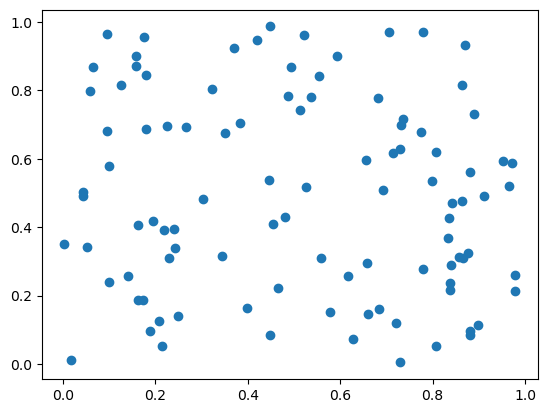

In [15]:
import matplotlib.pyplot as plt

PLOT_PATH = "plot.png"

plt.scatter(X, y)
plt.savefig("PLOT_PATH")

In [18]:
with mlflow.start_run():
    mlflow.log_artifact("PLOT_PATH.png")

🏃 View run nimble-gull-282 at: http://127.0.0.1:5000/#/experiments/209005185598130493/runs/b7a79daf254e4f3b9d012edb6ca5bbcb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/209005185598130493


### Log Model

In [19]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model

DecisionTreeRegressor()

In [20]:
import mlflow.sklearn


with mlflow.start_run():
    mlflow.sklearn.log_model(model, "model")

2025/06/17 11:02:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run honorable-crow-865 at: http://127.0.0.1:5000/#/experiments/209005185598130493/runs/0b13f79a64b447c38baa1c7b738593a9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/209005185598130493


#### Log Model with signature

In [21]:
import mlflow.models
import mlflow.sklearn
from mlflow.models import infer_signature



with mlflow.start_run():
    signature = mlflow.models.infer_signature(model_input=X, model_output=y)
    mlflow.sklearn.log_model(model, "model", signature=signature)

🏃 View run funny-crane-683 at: http://127.0.0.1:5000/#/experiments/209005185598130493/runs/8989c0251fec49789af3549aaeda00d2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/209005185598130493


#### Log Dataset

In [23]:
import pandas as pd

df = pd.DataFrame({
    "X": X.flatten(),
    "y": y.flatten()
})



In [24]:
with mlflow.start_run():
    dataset = mlflow.data.from_pandas(df)
    mlflow.log_input(dataset)

🏃 View run sincere-finch-351 at: http://127.0.0.1:5000/#/experiments/209005185598130493/runs/336f11b2adb14908a2447569d7a70aad
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/209005185598130493


#### Autolog

In [25]:
mlflow.autolog()

2025/06/17 11:20:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/06/17 11:20:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


In [ ]:
with mlflow.start_run():
    model.fit(X, y)
    model.predict(X)

🏃 View run aged-fowl-233 at: http://127.0.0.1:5000/#/experiments/209005185598130493/runs/efb211f0ac204f49a093439b400f240e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/209005185598130493
